<a href="https://colab.research.google.com/github/daninil77/lab1/blob/master/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_1_%D0%9C%D0%B0%D0%BD%D0%B0%D0%BD%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ### Тема: Решение нелинейных уравнений

**Выполнил**: Мананников Даниил (ИВТ-22) (danil_game1@mail.ru)

**Преподаватель**: Гурьянов М.А., кафедра ВМ-1

###### Лабораторная работа № **1**, вариант № **15**

###### Весенний семестр, 2022 год

###### МИЭТ, Зеленоград

### 1. Теоретическая справка 



Все уранвения, которые не являются линейными называются нелинейными. Нелинейным называется уравнение вида $f(x) = 0$ , где $f(x)$ - некоторая нелинейная функция, $f(x)$ не равен  $a*x + b$, где $a,b = const$

Поиск корня - процесс итерационный

$x_n$ - $n$-ое приближение к корню

$x_*$  - точное значение корня

$|x_n - x_*|$ - погрешность на $n$-ом шаге

###**Задача численных методов не зная $x_*$ найти $x_n$ , так, чтобы $|x_n - x_*| < ϵ$ , где $ϵ$ - заданная точность

Шаги реализации решения уравнения : 
1. Локализовать корень - найти отрезок $[a,b]$, содержащий *единственный корень*
2. Применить на отрезок $[a,b]$ один из методов решения с заданной точность $ϵ$


Способы локализации корня :
1. Исследовать ур-е методам **Математического анализа** 
2. Физические соображение. Например скорость $u > 0$ и $u < u_m$
3. Построить приближенно график функции
4. Составить таблицу знаков функции с некоторым шагом

В лабораторной работе рассматриваются 2 метода решения нелинейного уравнения : 
1. **Метод Дихотомии**
2. **Метод Ньютона**

### **Метод Дихотомии**

Метод Дихотомия - метод деление отрезка попал.

Метод деления пополам позволяет исключать в точности половину интервала на каждой итерации. При использовании метода считается, что функция непрерывна и имеет на концах интервала разный знак $f(x) * f(b) < 0$ (*обязательное требование*). После вычисления значения функции в середине интервала одна часть интервала отбрасывается так, чтобы функция имела разный знак на концах оставшейся части. Итерации метода деления пополам прекращаются, если интервал становится достаточно малым

### **Метод Ньютона**

Входным параметром алгоритма, кроме функции $f(x)$, является также начальное приближение - некоторое $x_0$, от которого алгоритм начинает идти

Пусть уже вычислено $x_i$, вычислим $x_{i+1}$ следующим образом. Проведем касательную к графику функции $f(x)$ в точке $x = x_i$ и найдем точку пересечения этой касательной с осью абсцисс. $x_{i+1}$ положим равным найденной точке, и повторим весь процесс с начала.

Формула будет иметь вид :
$$
  x_{i+1} = x_i - \frac{f(x_i)}{f^\prime(x_i)}
$$

Если функция $f(x)$ достаточно гладкая, а $x_i$ находится достаточно  близко от корня, то $x_{i+1}$ будет находиться еще ближе к искомому корню.

Скорость сходимости является квадратичной, что, условно говоря, означает, что число точных разрадов в приближенном значении $x_i$, удваивается с каждой итерацией

### 3. Предлагаемое решение и его точность
$$$$
В качестве входных параметров используются : 
* Целевая функция $f(x)$ заданная симваольно(аналитически)
* Отрезок $[a,b]$ определяемый оператором 
* Требуемая точность результата $\epsilon$
* Первое приблежние корня $\bar x = x_0$, которое 
  * в случае метода Ньютона задается оператором 
  * в случае метода Дихитомии определяется как $x_0 = (a+b)/2$

$$$$
**Результатом работы являются**
*Численное значние $\bar x$ с заданной точностью $ϵ$
$$$$

$$$$
**Источники ошибки**:
1. Метод решения (дихотомии или деления пополам) должен сходиться, в противном случае $\epsilon = \infty$
2. Количество итераций $n$ метода решения определяет ошибку
   1. Дихотомия: $$\epsilon = \frac{|b-a|}{2^n}$$
   2. Ньютон (формула действительна для $x_0-\bar x < 1$): $$\epsilon = |x_0 - \bar x|^{2n}$$
3. Входные данные считаются точными и ошибки не привносят
4. В программе величина ошибки ограничена точностью вычислений. При расчетах используется точность Double так что можно сказать что существует предел для значения $\epsilon$: $$\epsilon_{min} = 10^{-15}$$

##### Алгоритм решения методом Ньютона

**Шаг 1**: Запомнить текущее состояние и увеличить счетчик шагов 

$$
x_{old} = x\\
x = x_{new}\\
f = f(x)
$$

**Шаг 2**: Посчитать производную численно
$$
f' \approx \frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}
$$

**Шаг 3**: Посчитать и запомнить новое приближение корня
$$
x_{new} = x - \frac{f}{f'} \approx  x - \frac{2f(x)\epsilon}{f(x+\epsilon)-f(x-\epsilon)}
$$

**Шаг 4**: Проверить условие сходимости, проверить текущую невязку и перейти к шагу 1
$$
\begin{cases}
|x_{new} - x| < |x - x_{old}|\\
\epsilon_{new} = f' \cdot |x_{new} - x|\\
\end{cases}
$$
Если требуемая точность не достигнута, мы продолжаем
$$
\epsilon_{new} > \epsilon 
$$

### 2.***Постановка задачи. Изображение функции на отрезке [1;2]***

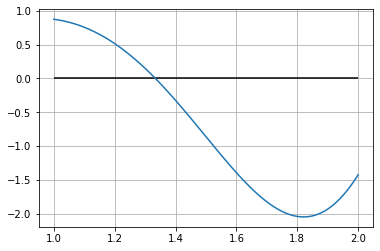

In [54]:
import numpy as np
import matplotlib.pyplot as plt

## Задаем функцию y=(log(x)+x)cos(x^2)+1/3
researched_func= lambda x:(np.log(x)+x)*(np.cos(x**(2)))+1/3
func_domain = (1,2)

## Изображение функции

# Рисуем:
x = np.linspace(func_domain[0], func_domain[1],1000)
y = researched_func(x)

plt.plot(x,y)
plt.hlines(0,1,2)
plt.grid(True)
plt.show()



Как мы видим у нашей функции есть четко выделенный корень на интервале примерно от 1,2 до 1,4. На этом интервале мы применим метод дихотомии

## **1.  Решение методом Дихотомии**


**Текст, выделенный полужирным шрифтом**>**Задание # 1**: Модифицируйте так чтобы алгоритм заканчивался если вдруг случайно при делении отрезка пополам попал на точное значение корня. Протестируйте на функции $$y = (x-3)(x-1)$$

>Ищите корень $x = 1$ на отрезке $x\in[0,2]$

  Код с изменениями,проверку осущетвим на функции  $$y = (x-3)(x-1)$$

In [4]:
def dyhotomy_root_upgraded(func,interval,eps=0.0001):
    (left,right) = interval 

    root = None
    roots = []

    # Алгоритм работы по шагам указан в пункте "Решение". Шаги отмечены в коде.
    while ((right - left) > eps) and (root == None):

        # Шаг 1: Проверить условие точности и Рассчитать координаты центра
        center = (right + left)/2

        # Добавляем предполагаемый корень в массив шагов алгоритма
        roots.append(center)

        #При попадании центра прямо на точное значение корня, алгоритм останавливается
        #И выводит найденные корни
        if(func(center)==0): 

          #root_dps нужна чтобы узнать необходимое количество знаков после запятой
          #по введенному пользователем eps
          #log10(eps) высчитывает степень (степень и есть количество знаков ), 
          #А знак "-" делает число положительным
          root_dps = int(round((-np.log10(eps))))

          if root_dps <= 0:
            root_dps = 1
          
          print ("Корень был найден в X =",round (center,root_dps))
          print ("С точностью EPS = ",eps)
          return roots

        # Шаг 2: выбрать половинку в которой находится корень.
        if  (func(left)*func(center) <0):

            # Корень в левой половинке отрезка
            # Шаг 3: Взять в качестве исходной ЛЕВУЮ половинку отрезка и перейти к шагу 1
            right = center

        else:

            # Корень в правой половинке отрезка
            # Шаг 3: Взять в качестве исходной ПРАВУЮ половинку отрезка и перейти к шагу 1
            left = center

    # Шаг 4: Вычислить окончательное значение корня уравнения
    root =  (right + left)/2

    # Добавляем предполагаемый корень в массив шагов алгоритма
    roots.append(root)

    
    root_dps = int(round((-np.log10(eps))))

    # Если пользователь задал точность в ноль знаков после запятой (что бывает) 
    # надо вывести хотя бы один...
    if root_dps <= 0:
        root_dps = 1
    
    # Выводим только правильные цифры в значении Х.
    # 

    print ("Корень был найден в X =",round (root,root_dps))
    print ("С точностью EPS = ",eps)
    return roots

researched_func = lambda x: (x-3)*(x-1)
func_domain = (0,2)
dyhotomy_steps_x = dyhotomy_root_upgraded(researched_func,func_domain,0.0001)
print(len(dyhotomy_steps_x))

Корень был найден в X = 1.0
С точностью EPS =  0.0001
1


####Решение методом Дихотомии своей функции

#Функция:
y=(log(x)+x)cos(x^2)+1/3


In [5]:
def dyhotomy_root_upgraded(func,interval,eps=0.0001):
    (left,right) = interval 

    root = None
    roots = []

    # Алгоритм работы по шагам указан в пункте "Решение". Шаги отмечены в коде.
    while ((right - left) > eps) and (root == None):

        # Шаг 1: Проверить условие точности и Рассчитать координаты центра
        center = (right + left)/2

        # Добавляем предполагаемый корень в массив шагов алгоритма
        roots.append(center)

        #При попадании центра прямо на точное значение корня, алгоритм останавливается
        #И выводит найденные корни
        if(func(center)==0): 

          #root_dps нужна чтобы узнать необходимое количество знаков после запятой
          #по введенному пользователем eps
          #log10(eps) высчитывает степень (степень и есть количество знаков ), 
          #А знак "-" делает число положительным
          root_dps = int(round((-np.log10(eps))))

          if root_dps <= 0:
            root_dps = 1
          
          print ("Корень был найден в X =",round (center,root_dps))
          print ("С точностью EPS = ",eps)
          return roots

        # Шаг 2: выбрать половинку в которой находится корень.
        if  (func(left)*func(center) <0):

            # Корень в левой половинке отрезка
            # Шаг 3: Взять в качестве исходной ЛЕВУЮ половинку отрезка и перейти к шагу 1
            right = center

        else:

            # Корень в правой половинке отрезка
            # Шаг 3: Взять в качестве исходной ПРАВУЮ половинку отрезка и перейти к шагу 1
            left = center

    # Шаг 4: Вычислить окончательное значение корня уравнения
    root =  (right + left)/2

    # Добавляем предполагаемый корень в массив шагов алгоритма
    roots.append(root)

    
    root_dps = int(round((-np.log10(eps))))

    # Если пользователь задал точность в ноль знаков после запятой  надо вывести хотя бы один...
    if root_dps <= 0:
        root_dps = 1
    
    # Выводим только правильные цифры в значении Х.
     

    print ("Корень был найден в X =",round (root,root_dps))
    print ("С точностью EPS = ",eps)

    
    return roots

researched_func = lambda x:(np.log(x)+x)*(np.cos(x**(2)))+1/3 
func_domain = (1,2)
dyhotomy_steps_x = dyhotomy_root_upgraded(researched_func,func_domain,0.00001)
print(len(dyhotomy_steps_x))

Корень был найден в X = 1.33338
С точностью EPS =  1e-05
18


**Задание № 2**  Постройте график зависимости количества правильных знаков после запятой от количества шагов алгоритма. Это задание выполните для всех методов поиска корня в вашей лабораторной

Корень был найден в X = 1.5
С точностью EPS =  1
Корень был найден в X = 1.3
С точностью EPS =  0.1
Корень был найден в X = 1.33
С точностью EPS =  0.01
Корень был найден в X = 1.333
С точностью EPS =  0.001
Корень был найден в X = 1.3334
С точностью EPS =  0.0001
Корень был найден в X = 1.33338
С точностью EPS =  1e-05
Корень был найден в X = 1.333377
С точностью EPS =  1e-06
Корень был найден в X = 1.3333777
С точностью EPS =  1e-07
Корень был найден в X = 1.33337772
С точностью EPS =  1e-08
Корень был найден в X = 1.333377726
С точностью EPS =  1e-09
Корень был найден в X = 1.3333777256
С точностью EPS =  1e-10
Корень был найден в X = 1.33337772558
С точностью EPS =  1e-11
Корень был найден в X = 1.333377725583
С точностью EPS =  1e-12


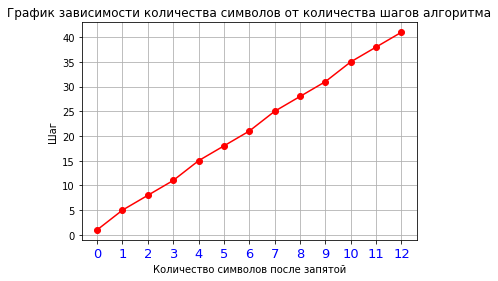

In [6]:
steps = []
decimal_places = []
for i in range(0,13):
  decimal_places.append(int(round((-np.log10(10**(-i))))))
  steps.append(len(dyhotomy_root_upgraded(researched_func, func_domain, 10**(-i))))
# график зависимости
x = decimal_places
y = steps
plt.plot(x,y,'ro-')
plt.xticks(decimal_places, color="b", size=13)
plt.ylabel('Шаг')
plt.xlabel('Количество символов после запятой')
plt.title('График зависимости количества символов от количества шагов алгоритма')
plt.grid(True)
plt.show()

> **Задание № 3**  самостоятельно разберитесь с командой SUBPLOT (как в матлабе) и нарисуйте рядом справа от этого графика еще один с другим масштабом и без аннотаций. Выделите код рисования графика в отдельную функцию.

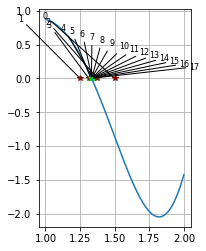

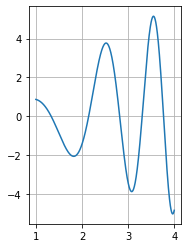

In [7]:
def plot_roots_sequence(x_array,annotations = True):
    n = len(x_array)
    # Цвета кодируем в формате RGB
    colors = np.zeros((n,3))
    #Красный цвет уменьшается
    colors[:,0] = np.linspace(0.5,0,n)
    #Зеленый цвет возрастает
    colors[:,1] = np.linspace(0,1,n)

    for i in range(n):
        #Рисуем точку звездочкой.
        plt.plot(x_array[i],0,c = colors[i], label = i, marker='*')     
        if annotations:
            # Функция аннотации помечает текстом каждую из точек. 
            plt.annotate(i,
                 xy=(x_array[i], 0), xycoords='data',
                 xytext=(-8*n/2+10*(i), +3*(n-i+2)), 
                 textcoords='offset points', fontsize=8,
                 arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

# Теперь запустим нашу функцию
plt.subplot(1,2,1);
plot_roots_sequence(dyhotomy_steps_x)

# Строительство графика plot_func
def plot_func(researched_func,interval=(1,2)):
  x = np.linspace(interval[0],interval[1],1000)
  y = researched_func(x)
  plt.plot(x,y)
  plt.grid(True)
  plt.show()

plot_func(researched_func)
plt.subplot(1,2,2)
plot_func(researched_func,(1,4))

#### Решение методом Ньютона

In [19]:
def newton_root(func,first_approx,interval,eps = 0.0001, need_print=True):
    """Find the root on the interval by
    Newtons method"""
    
    
    def numerical_diff(f,x,eps = 0.001):
        """Calculates differential by definition"""
        res = (f(x+eps)-f(x-eps))/(2*eps)
        return res
    
    x = first_approx
    x_next = x
    x_old = x

    error = False
    
    
    # Запомним количество шагов
    steps = 0

    # Создаем массив корней куда запишем последовательно все результаты
    x_array = []
    x_array.append(x)
    
    
    #Проведём первую итерацию вне цикла, чтобы не было индусокода
    steps += 1
    x = x_next
    f_current = func(x)
    df = numerical_diff(func,x)

    x_next = x - f_current/df
    
    x_array.append(x_next)
    f_next = func(x_next)

    eps_new = df*abs(x_next-x)

    if (abs(f_next) - abs(f_current)) > 0:
            error = True

    root_dps = int(round((-np.log10(eps))))

    while (abs(eps_new) > eps):
        # Шаг 1: Запомнить текущее состояние и увеличить счетчик шагов
        x_old = x
        steps += 1
        x = x_next
        f_current = func(x)
        df = numerical_diff(func,x)

        # шаг 2: Посчитать следующее приближение корня через производную.
        x_next = x - f_current/df

        # шаг 3: Запомнить новое приближение корня
        x_array.append(x_next)
        f_next = func(x_next)


        eps_new = df*abs(x_next-x)
        # Шаг 4: Проверить на расходимость и перейти к шагу 1
        # Для этого мы проверяем, стало ли значение функции уходить
        # с каждой итерацией всё дальше от нуля
        # ВАЖНО: это только один из вариантов проверки, общего решения нет.
        if (abs(f_next) - abs(f_current)) > 0:
            error = True
    
    # Если в ходе решения мы обнаружили проблемы со сходимостью, 
    # ответ мы не отдаем 
    if error:
        print("The method does not converge")
        return None
    else:
        if(need_print):
            print("The root is found in ", steps, "steps")
            print("the root is ",round(x_next, root_dps )) 
        return x_array

#Зададим вручную начальное приближение
x_seed = 1.4


# Посчитаем ответ

newton_steps_x = newton_root(researched_func,
                    x_seed,
                    func_domain,
                    0.0000001)


The root is found in  4 steps
the root is  1.3333777


> **Задание № 4**  Посчитайте для своей функции методом полного перебора с малым шагом интервал сходимости. т.е. найдите при каких начальных приближениях корень ищется корректно, а при каких - нет (лиоб происходит зацикливание либо находится не тот корень). Результат проиллюстрируйте графически. Посмотрите как в семинаре сделана подсведка отрезка командой PLOT и точно так же нарисуйте свой отрезок допустимых начальных значений

The method does not converge
The method does not converge
The method does not converge
The root is found in  5 steps
the root is  1.3334
The root is found in  4 steps
the root is  1.3334
The root is found in  4 steps
the root is  1.3334
The root is found in  3 steps
the root is  1.3334
The root is found in  3 steps
the root is  1.3334
The root is found in  3 steps
the root is  1.3334
The root is found in  4 steps
the root is  1.3334


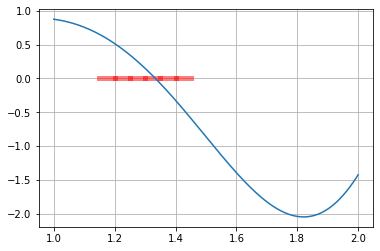

In [25]:
good_steps = []
interval = (1,1.5)
i = interval[0]
while i <= interval[1]:
  newton_steps_x = newton_root(researched_func, i, interval)
  
  if (newton_steps_x): good_steps.append(i)
  i+=0.05


for i in range(0, len(good_steps)-1):
  plt.plot([good_steps[i],good_steps[i+1]],[0,0],color = (1,0,0,0.5), linewidth = 5)

plot_func(researched_func)

Графическое представление корня 

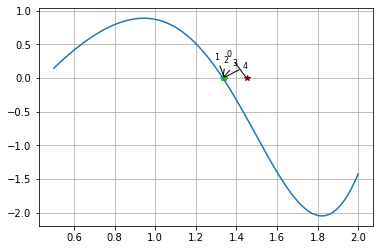

In [26]:
plot_roots_sequence(newton_steps_x)
x = np.linspace(0.5,2,100)
y = researched_func(x)
plt.plot(x,y)
plt.grid(True)
plt.show()

##Иследование

> **Задание № 5**  Перепишите метод ньютона так чтобы он всегда делал фиксированное заранее заданное количество итераций


In [42]:
def newton_root(func,first_approx,interval,steps, eps = 0.0001):

    def numerical_diff(x,eps = 0.001):
      # нахождение производная
        res = (1+1/x)*np.cos(2*x)-2*(np.log(x)+x)*np.sin(2*x)
        return res
    
    x = first_approx
    x_next = x

    ### Основная проблема метода ньютона - определить зациклился он или нет
    error = False

    f_next = func(x)
    f_current = func(x)*100
    df = numerical_diff(x)
    
    # Создаем массив корней куда запишем последовательно все результаты
    x_array = []
    x_array.append(x)

    for i in range(steps):
          x = x_next
          f_current = func(x)
          df = numerical_diff(x)

          x_next = x - f_current/df
          x_array.append(x_next)
          f_next = func(x_next)

          if (abs(f_next) - abs(f_current)) > 0:
              error = True
    if error:
        print("The method does not converge")
        return None
    else:
        print("the root is ",round(x_next,4))
        print("The root is found in ", steps, "steps")        
        return x_array

#Зададим вручную начальное приближение
x_seed = 1.4
#Кол-во заданных операций
n_steps = 5
# Посчитаем ответ
newton_steps_x = newton_root(researched_func,x_seed,(1, 2),n_steps, 0.00000001)

the root is  1.3307
The root is found in  5 steps


> **Задание № 6**  В качестве исследования сделайте следующее: Поменяйте код решения методом Ньютона таким образом чтобы принимать на вход функцию заданную символьно. Для этого используйте библиотеку Sympy или переменные Syms в Matlab. Посчитайте ее производную не численно как в коде выше, а аналитически используя команду DIFF. **В будущих лабораторных работах ставьте себе задачи для исследований самостоятельно или обращайтесь к преподавателю за заданием заранее, до срока сдачи.**

In [1]:
#Вылетала ошибка так и не понял как довести до работающего состаяния


